In [1]:
import numpy as np
import pandas as pd
import re

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

from sklearn.svm import SVC


import matplotlib.pyplot as plt




In [2]:
dataset = pd.read_csv('bbc.csv')

In [3]:
#dataset.info()
#dataset.head()
#dataset.shape
dataset['category'].unique()


array(['tech', 'business', 'sport', 'entertainment', 'politics'],
      dtype=object)

In [4]:
encode_x = LabelEncoder()

In [5]:
dataset['category'] = encode_x.fit_transform(dataset['category'])

In [6]:
dataset.head()

,category,text
0,4,tv future in the hands of viewers with home th...
1,0,worldcom boss left books alone former worldc...
2,3,tigers wary of farrell gamble leicester say ...
3,3,yeading face newcastle in fa cup premiership s...
4,1,ocean s twelve raids box office ocean s twelve...


In [7]:
dataset['text'] = dataset['text'].apply(nltk.word_tokenize)

In [8]:
dataset.head()

,category,text
0,4,"[tv, future, in, the, hands, of, viewers, with..."
1,0,"[worldcom, boss, left, books, alone, former, w..."
2,3,"[tigers, wary, of, farrell, gamble, leicester,..."
3,3,"[yeading, face, newcastle, in, fa, cup, premie..."
4,1,"[ocean, s, twelve, raids, box, office, ocean, ..."


In [9]:
stop_words=set(nltk.corpus.stopwords.words("english"))
dataset['text'] = dataset['text'].apply(lambda x: [item for item in x if item not in stop_words])

In [10]:
dataset.head()

,category,text
0,4,"[tv, future, hands, viewers, home, theatre, sy..."
1,0,"[worldcom, boss, left, books, alone, former, w..."
2,3,"[tigers, wary, farrell, gamble, leicester, say..."
3,3,"[yeading, face, newcastle, fa, cup, premiershi..."
4,1,"[ocean, twelve, raids, box, office, ocean, twe..."


In [11]:
regex = '[a-z]'
dataset['text'] = dataset['text'].apply(lambda x: [item for item in x if re.match(regex, item)])

In [12]:
lem = nltk.stem.wordnet.WordNetLemmatizer()
dataset['text'] = dataset['text'].apply(lambda x: [lem.lemmatize(item, pos='v') for item in x])

In [13]:
dataset.head()

,category,text
0,4,"[tv, future, hand, viewers, home, theatre, sys..."
1,0,"[worldcom, boss, leave, book, alone, former, w..."
2,3,"[tigers, wary, farrell, gamble, leicester, say..."
3,3,"[yeading, face, newcastle, fa, cup, premiershi..."
4,1,"[ocean, twelve, raid, box, office, ocean, twel..."


In [14]:
dataset['text'] = dataset['text'].apply(' '.join)
dataset.head()

,category,text
0,4,tv future hand viewers home theatre systems pl...
1,0,worldcom boss leave book alone former worldcom...
2,3,tigers wary farrell gamble leicester say rush ...
3,3,yeading face newcastle fa cup premiership side...
4,1,ocean twelve raid box office ocean twelve crim...


In [15]:
X = dataset['text']
y = dataset['category']
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size = 0.20 , random_state = 1)

In [16]:
vec = TfidfVectorizer()
X_train = vec.fit_transform(X_train)
X_test = vec.transform(X_test)

In [17]:
s = SVC()

In [18]:
s.fit(X_train , y_train)

SVC()

In [19]:
predict = s.predict(X_test)

In [20]:
accuracy_score(y_test , predict)

0.9865168539325843

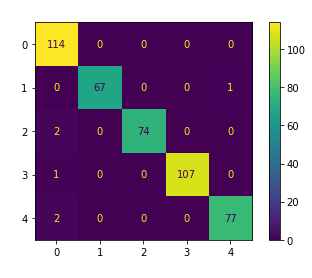

In [21]:
matrix = plot_confusion_matrix(s ,X_test , y_test )
matrix.ax_.set_title("Confusion matrix" , color = "white")
plt.xlabel("Predict" , color = "white")
plt.ylabel("True" , color = "white")
plt.show()

In [22]:
# Project end here

In [23]:
temp = input("Enter The Custome Artical  to test :)")

Enter The Custome Artical  to test :)Enter Your article here


In [24]:
temp =vec.transform([temp])

In [25]:
zz = s.predict(temp)

In [26]:
print(f'This artical belong to {encode_x.inverse_transform(zz)}')

This artical belong to ['business']
